In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

In [3]:
len(X_train)

50000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(32, 32, 3)

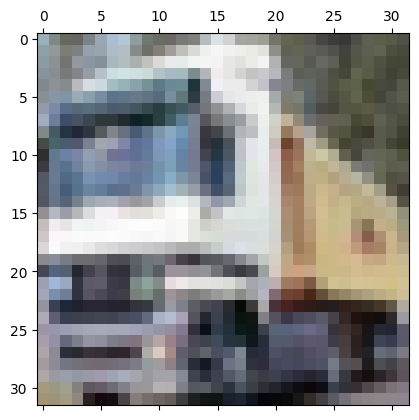

In [6]:
plt.matshow(X_train[1])

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

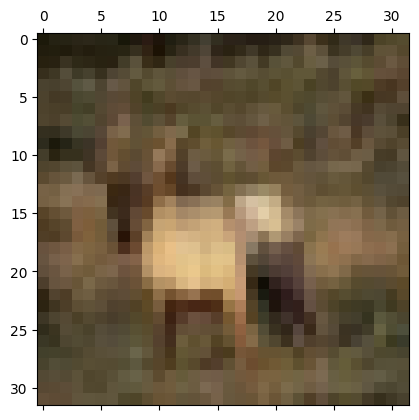

In [9]:
plt.matshow(X_train[3])

In [10]:
classes[y_train[3][0]]

'deer'

In [11]:
X_train=X_train/255
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
X_test=X_test/255
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [14]:
y_train_categorical=keras.utils.to_categorical(  # one hot encoding
    y_train,num_classes=10,dtype='float32'
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test_categorical=keras.utils.to_categorical(  # one hot encoding
    y_test,num_classes=10,dtype='float32'
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
X_train[0].shape

(32, 32, 3)

In [17]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train_categorical,epochs=5)



Epoch 1/5


1563/1563 [==============================] - 62s 39ms/step - loss: 1.8121 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.6214 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5404 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 63s 41ms/step - loss: 1.4805 - accuracy: 0.4793
Epoch 5/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4316 - accuracy: 0.4965


In [19]:
model.evaluate(X_test,y_test_categorical)

313/313 [==============================] - 2s 7ms/step - loss: 1.4725 - accuracy: 0.4692


[1.4724633693695068, 0.4691999852657318]

In [20]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [21]:
mod=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

mod.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mod.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8138 - accuracy: 0.3521
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6245 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5440 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4834 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4332 - accuracy: 0.4975


In [22]:
mod.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.6014 - accuracy: 0.4365


[1.6014460325241089, 0.43650001287460327]